# Topic 1: Forecast the prices of Avocado in the US

## Business Objective/Problem
 - Bơ “Hass”, một công ty có trụ sở tại Mexico,
chuyên sản xuất nhiều loại quả bơ được bán
ở Mỹ. Họ đã rất thành công trong những năm
gần đây và muốn mở rộng. Vì vậy, họ muốn
xây dựng mô hình hợp lý để dự đoán giá
trung bình của bơ “Hass” ở Mỹ nhằm xem
xét việc mở rộng các loại trang trại Bơ đang
có cho việc trồng bơ ở các vùng khác.

## Triển khai dự án
### <font color='red'> Bước 1: Business Understanding
Dựa vào mô tả nói trên (hoặc sau khi đặt ra các câu
hỏi cụ thể cho doanh nghiệp và các đối tượng có liên
quan) => xác định được vấn đề:
- Hiện tại: Công ty kinh doanh quả bơ ở rất nhiều vùng của
nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được
đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags),
và có 3 PLU (Product Look Up) khác nhau (4046, 4225,
4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho
việc mở rộng.
- => Mục tiêu/ Vấn đề: Xây dựng mô hình dự đoán giá trung
bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất,
kinh doanh.

### <font color='red'>Bước 2: Data Understanding/ Acquire
#### Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ
liệu mà công ty đang có:
- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán
lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng
tuần cho lượng bán lẻ (National retail volume- units) và giá
bơ từ tháng 4/2015 đến tháng 3/2018.
- Giá Trung bình (Average Price) trong bảng phản ánh giá
trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ)
được bán trong bao.
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong
bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm
khác.


### Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv với 18249 record. Với các cột:
  - Date - ngày ghi nhận
  - AveragePrice – giá trung bình của một quả bơ
  - Type - conventional / organic – loại: thông thường/ hữu cơ
  - Region – vùng được bán
  - Total Volume – tổng số bơ đã bán
  - 4046 – tổng số bơ có mã PLU 4046 đã bán
  - 4225 - tổng số bơ có mã PLU 4225 đã bán
  - 4770 - tổng số bơ có mã PLU 4770 đã bán
  - Total Bags – tổng số túi đã bán
  - Small/Large/XLarge Bags – tổng số túi đã bán theo size

Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều
này cho phép chúng ta thực hiện tất cả các loại phân tích cho
các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một
trong hai loại bơ.



=> Có thể tập trung giải quyết hai bài toán
- Bài toán 1: USA’s Avocado AveragePrice
Prediction – Sử dụng các thuật toán Regression
như Linear Regression, Random Forest,
XGB Regressor...
- Bài toán 2: Conventional/Organic Avocado
Average Price Prediction for the future in
California/NewYork… - sử dụng các thuật toán
Time Series như ARIMA, Prophet...

### <font color='red'> Bước 3: Data preparation/ Prepare

In [1]:
! pip install fbprophet
! pip install pandas-profiling==2.7.1
! pip install pmdarima

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_1'

/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_1


In [4]:
# import libraries
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas_profiling import ProfileReport

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing


import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Đọc dữ liệu

In [5]:
data = pd.read_csv('avocado.csv')

In [6]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data = data.drop('Unnamed: 0', axis = 1)

In [8]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


# Bài Toán 2: California's Organic Avocados' Price Prediction in Future
- Thực hiện các thuật toán ARIMA, Facebook
Prophet... để dự đoán giá, khả năng mở rộng trong
tương lai của Organic Avocado ở vùng California.
- Tổng hợp kết quả thu được.

#### Use DataFrame df for Regression Algorithm

In [10]:
df = data.copy(deep=True)

### 1. Kiểm tra dữ liệu: EDA

In [11]:
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

#### From Pandas Prifiling Report, we see that:
-  No missing value
-  No duplicate rows

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [13]:
# Chuyển dữ liệu cột Date sang datetime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [15]:
# Tạo một DataFrame mới chứa giá bơ organic của vùng California
df2 = df[(df['type']=='organic') & (df['region']=='California')][['Date','AveragePrice']].sort_values("Date")

In [16]:
df2.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [17]:
df2.columns = ['ds','y']

In [18]:
df2 = df2.reset_index().drop('index', axis = 1)

In [19]:
df2.head()

,ds,y
0,2015-01-04,1.24
1,2015-01-11,1.10
2,2015-01-18,1.24
3,2015-01-25,1.30
4,2015-02-01,1.11


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      169 non-null    datetime64[ns]
 1   y       169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [21]:
df2.tail()

,ds,y
164,2018-02-25,1.82
165,2018-03-04,1.57
166,2018-03-11,1.58
167,2018-03-18,1.75
168,2018-03-25,1.70


In [22]:
df2.head()

,ds,y
0,2015-01-04,1.24
1,2015-01-11,1.10
2,2015-01-18,1.24
3,2015-01-25,1.30
4,2015-02-01,1.11


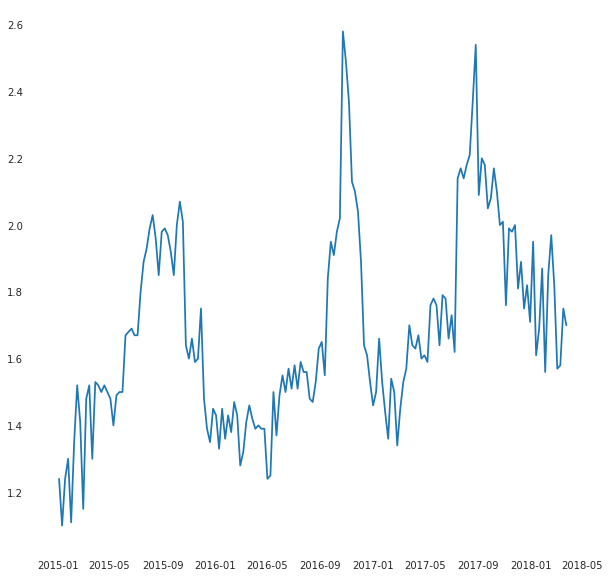

In [23]:
# Trực quan hóa dữ liệu ban đầu
plt.figure(figsize=(10,10))
plt.plot(df2['ds'], df2['y'])
plt.show()

Giá bơ organic tại California 
- Có nhiều biến động qua các năm
- Giá bơ có xu hướng tăng dần từ đầu năm đến cuối năm, sau đó giảm mạnh đến đầu năm sau

In [24]:
df_arima = df2.copy(deep = True)
df_arima.index = pd.to_datetime(df_arima.ds)
df_arima = df_arima.drop('ds', axis = 1)
df_arima.head()

,y
ds,
2015-01-04,1.24
2015-01-11,1.10
2015-01-18,1.24
2015-01-25,1.30
2015-02-01,1.11


# Decomposition

In [25]:
from statsmodels.tsa.seasonal import  seasonal_decompose
result = seasonal_decompose(df_arima, model= 'multiplicative')
result

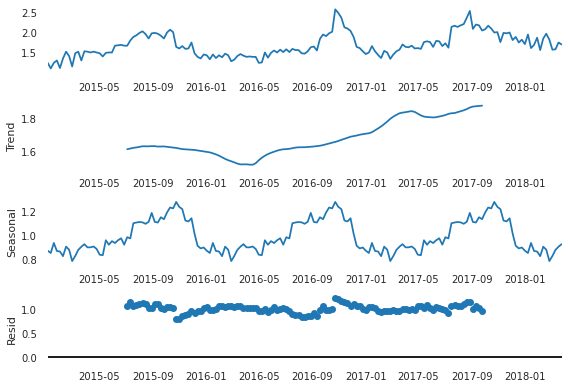

In [26]:
result.plot()
plt.show()

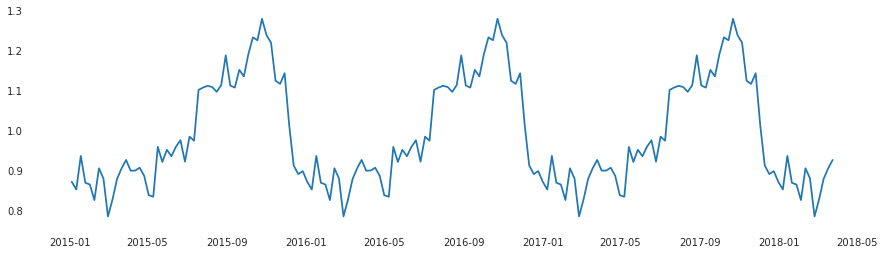

In [27]:
# Trực quan hóa seasonal
plt.figure(figsize=(15,4))
plt.plot(result.seasonal)
plt.show()

Seasonal: Giá thấp từ đâu đến giữa năm, sau đó tăng mạnh đến cuối năm

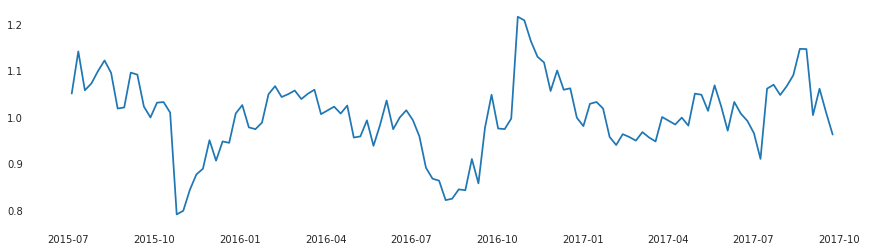

In [28]:
# Trực quan hóa resid
plt.figure(figsize=(15,4))
plt.plot(result.resid)
plt.show()

Residuals nhìn chung khá ổn định theo năm

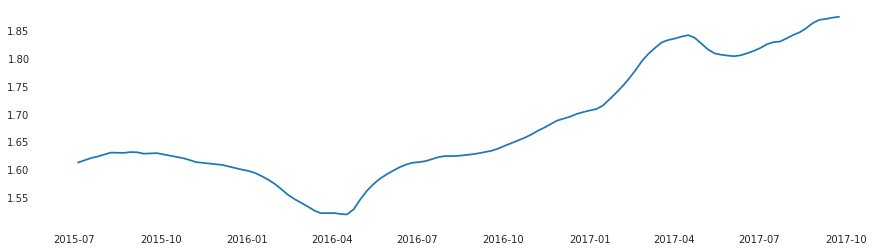

In [29]:
# Trực quan hóa trend
plt.figure(figsize=(15,4))
plt.plot(result.trend)
plt.show()

Giá bơ có giảm từ tháng 07/2015 đến tháng 04/2016, nhưng sau đó thì tăng mạnh đến tháng 04/2017. Tù tháng 04/2017 đến tháng 10/2017 có giảm nhẹ sau đó tăng chậm

# ARIMA

In [30]:
stepwise_model = auto_arima(df_arima, start_p=2, start_q=2, 
                           max_p=5, max_q=5, m=52,
                           start_P=1, d=1, D=None, seasonal=True,
                           trace=True, error_action='ignore',
                           suppres_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=12.05 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=-179.426, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=-182.530, Time=4.50 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=-185.634, Time=1.81 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=-181.361, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=-187.634, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=-185.634, Time=1.63 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=-183.635, Time=2.41 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=-186.385, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=-187.129, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=-184.529, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=-185.961, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=-189.485, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[52]             : AIC=-187.485, Time=0.75 sec
 ARIMA(0,1,1)(0,0,1)[52

In [31]:
# ACI
print(stepwise_model.aic())

-189.4852848155354


In [32]:
# Chia tập dữ liệu train - 80%, test - 20%
train, test = df_arima.iloc[:135], df_arima.iloc[135:]

In [33]:
train.shape, test.shape

((135, 1), (34, 1))

In [34]:
train.head()

,y
ds,
2015-01-04,1.24
2015-01-11,1.10
2015-01-18,1.24
2015-01-25,1.30
2015-02-01,1.11


In [35]:
test.head()

,y
ds,
2017-08-06,2.18
2017-08-13,2.21
2017-08-20,2.37
2017-08-27,2.54
2017-09-03,2.09


In [36]:
test.tail()

,y
ds,
2018-02-25,1.82
2018-03-04,1.57
2018-03-11,1.58
2018-03-18,1.75
2018-03-25,1.70


In [37]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [38]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [39]:
future_forecast

array([2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398,
       2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398,
       2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398,
       2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398,
       2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398, 2.1420398,
       2.1420398, 2.1420398, 2.1420398, 2.1420398])

In [40]:
future_forecast = pd.DataFrame(future_forecast, index= test.index, columns=['Prediction'])
pred_arima = future_forecast.copy()
pred_arima['Actual'] = test.y
pred_arima

,Prediction,Actual
ds,,
2017-08-06,2.14204,2.18
2017-08-13,2.14204,2.21
2017-08-20,2.14204,2.37
2017-08-27,2.14204,2.54
2017-09-03,2.14204,2.09
2017-09-10,2.14204,2.20
2017-09-17,2.14204,2.18
2017-09-24,2.14204,2.05
2017-10-01,2.14204,2.08


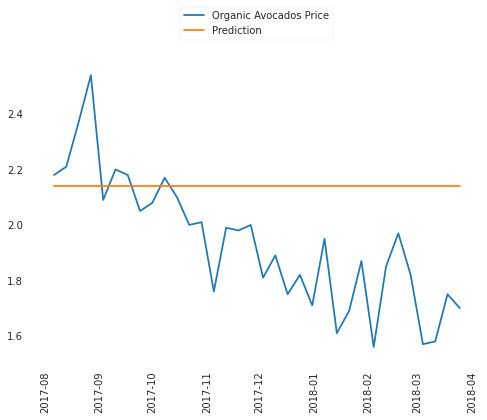

In [41]:
plt.plot(test, label = 'Organic Avocados Price')
plt.plot(future_forecast, label = 'Prediction')
plt.xticks(rotation = 'vertical')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

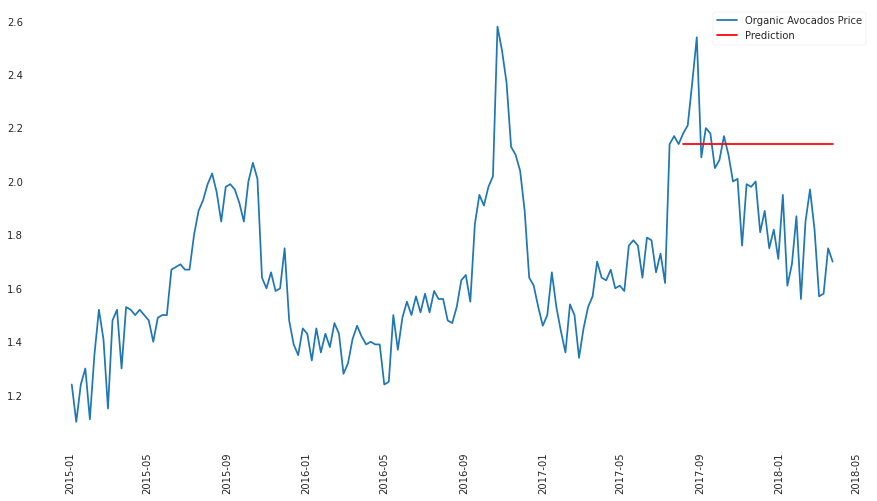

In [42]:
# Trực quan hóa dữ liệu cho cả tập Train và Test (Từ 2015-01-04 đến 2018-03-25)
plt.figure(figsize=(15,8))
plt.plot(df_arima, label = 'Organic Avocados Price')
plt.plot(future_forecast, label = 'Prediction', color = 'red')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()


In [43]:
mse_arima = mean_squared_error(test,future_forecast)
mae_arima = mean_absolute_error(test, future_forecast)

In [44]:
print('MSE: ', mse_arima)
print('MAE: ', mae_arima)

MSE:  0.09581160959995494
MAE:  0.2567881193122495


- Nhận xét: Kết quả dự đoán của Model Arima cho tập dữ liệu test gần như là không đổi, điều này cho thấy rằng mô mình ARIMA chưa thể phù hợp cho tập dữ liệ này.
- => Cần sủ dụng một model khác cho bài toán này

# HoltWinters

In [45]:
train.head()

,y
ds,
2015-01-04,1.24
2015-01-11,1.10
2015-01-18,1.24
2015-01-25,1.30
2015-02-01,1.11


In [46]:
train.tail()

,y
ds,
2017-07-02,1.73
2017-07-09,1.62
2017-07-16,2.14
2017-07-23,2.17
2017-07-30,2.14


In [47]:
test.head()

,y
ds,
2017-08-06,2.18
2017-08-13,2.21
2017-08-20,2.37
2017-08-27,2.54
2017-09-03,2.09


In [48]:
test.tail()

,y
ds,
2018-02-25,1.82
2018-03-04,1.57
2018-03-11,1.58
2018-03-18,1.75
2018-03-25,1.70


In [49]:
model_holt = ExponentialSmoothing(train, seasonal='add',
                             trend = 'add',
                             damped_trend=True,
                             seasonal_periods= 52).fit()
pred_holt = model_holt.predict(start=test.index[0], 
                     end=test.index[-1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [50]:
pred = pd.DataFrame(pred_holt,columns=[ 'Predict'])
# pred_holt = pred.copy()
# pred_holt['Actual'] = test.y
pred

,Predict
2017-08-06,2.123739
2017-08-13,2.080619
2017-08-20,2.052622
2017-08-27,2.164663
2017-09-03,2.176766
2017-09-10,2.113936
2017-09-17,2.231133
2017-09-24,2.248385
2017-10-01,2.300662
2017-10-08,2.367979


In [51]:
start=test.index[0], 
end=test.index[-1]
start, end

((Timestamp('2017-08-06 00:00:00'),), Timestamp('2018-03-25 00:00:00'))

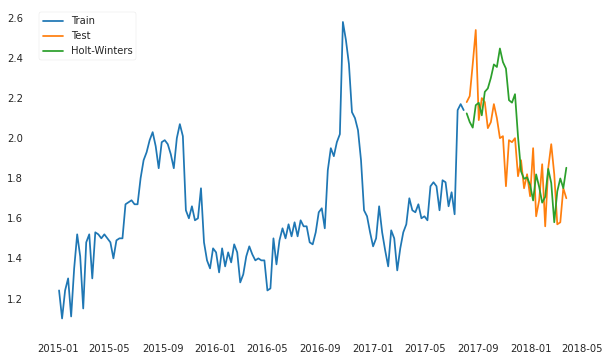

In [52]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

In [53]:
mse_holt = mean_squared_error(test,pred)
mae_holt = mean_absolute_error(test, pred)
print('MSE - Holt: ', mse_holt)
print('MAE - Holt: ', mae_holt)

MSE - Holt:  0.049884322301120075
MAE - Holt:  0.1828283633709036


# Dự đoán 1 năm tiếp theo

In [54]:
s = datetime.datetime(2018, 4, 1)
e = datetime.datetime(2019, 4, 1)
pred_next_1_years = model_holt.predict(start= s, end=e)
pred_next_1_years 

2018-04-01    1.814523
2018-04-08    1.803638
2018-04-15    1.816337
2018-04-22    1.782564
2018-04-29    1.725677
2018-05-06    1.692294
2018-05-13    1.859086
2018-05-20    1.822699
2018-05-27    1.853105
2018-06-03    1.886983
2018-06-10    1.920979
2018-06-17    1.941724
2018-06-24    1.872573
2018-07-01    1.916842
2018-07-08    1.897851
2018-07-15    2.125613
2018-07-22    2.136735
2018-07-29    2.144592
2018-08-05    2.123740
2018-08-12    2.080620
2018-08-19    2.052622
2018-08-26    2.164663
2018-09-02    2.176767
2018-09-09    2.113936
2018-09-16    2.231133
2018-09-23    2.248386
2018-09-30    2.300662
2018-10-07    2.367979
2018-10-14    2.355274
2018-10-21    2.447609
2018-10-28    2.379980
2018-11-04    2.347310
2018-11-11    2.189739
2018-11-18    2.177172
2018-11-25    2.219611
2018-12-02    2.007141
2018-12-09    1.834611
2018-12-16    1.797101
2018-12-23    1.804610
2018-12-30    1.766446
2019-01-06    1.689050
2019-01-13    1.819141
2019-01-20    1.756663
2019-01-27 

In [55]:
x = pd.Series(pred_next_1_years)

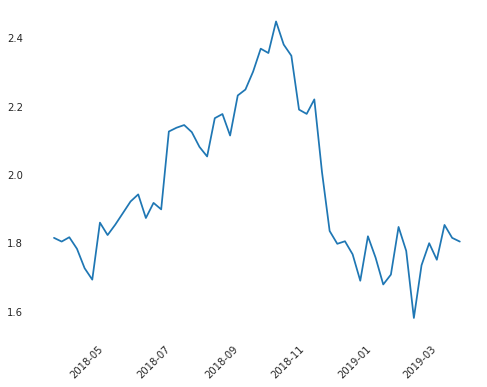

In [56]:
plt.figure(figsize=(8,6))
plt.plot(x.index, x.values)
plt.xticks(rotation = 45)
plt.show()

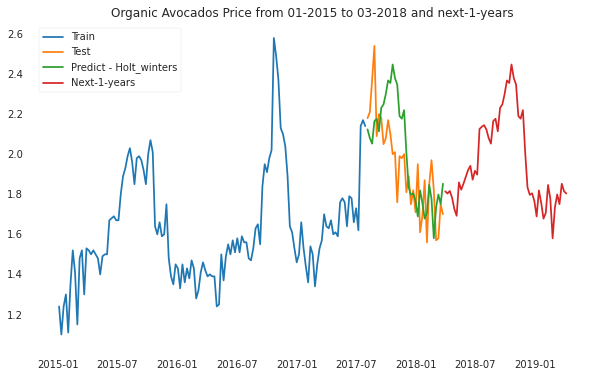

In [57]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(pred.index, pred, label = 'Predict - Holt_winters')
plt.plot(x.index, x.values, label = 'Next-1-years')
plt.legend(loc = 'best')
plt.title('Organic Avocados Price from 01-2015 to 03-2018 and next-1-years')
plt.show()

## Facebook Prophet

In [58]:
# Train va test: Train: 80%, test: 20%
# Total: 169 => Train: 135, Test: 34
train = df2.drop(df2.index[-34:])
test = df2.drop(df2.index[0:-34])

In [59]:
train.head()

,ds,y
0,2015-01-04,1.24
1,2015-01-11,1.10
2,2015-01-18,1.24
3,2015-01-25,1.30
4,2015-02-01,1.11


In [60]:
train.tail()

,ds,y
130,2017-07-02,1.73
131,2017-07-09,1.62
132,2017-07-16,2.14
133,2017-07-23,2.17
134,2017-07-30,2.14


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      135 non-null    datetime64[ns]
 1   y       135 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [62]:
test.head()

,ds,y
135,2017-08-06,2.18
136,2017-08-13,2.21
137,2017-08-20,2.37
138,2017-08-27,2.54
139,2017-09-03,2.09


In [63]:
test.tail()

,ds,y
164,2018-02-25,1.82
165,2018-03-04,1.57
166,2018-03-11,1.58
167,2018-03-18,1.75
168,2018-03-25,1.70


In [64]:
threshold_date = pd.to_datetime('2017-07-30')

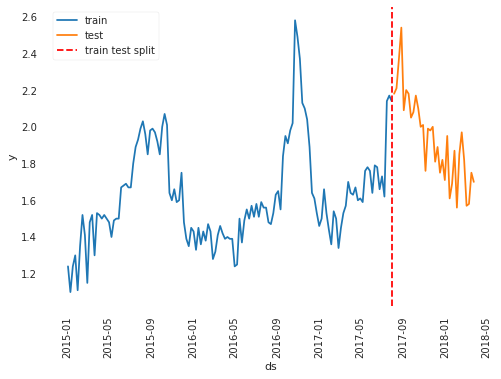

In [65]:
fig, ax = plt.subplots()
sns.lineplot(x='ds', y='y', label='train', data=train, ax=ax)
sns.lineplot(x='ds', y='y', label='test', data=test, ax=ax)
ax.axvline(threshold_date, linestyle='--', label='train test split', color = 'r')
ax.legend(loc='upper left')
plt.xticks(rotation = 90)
plt.show()

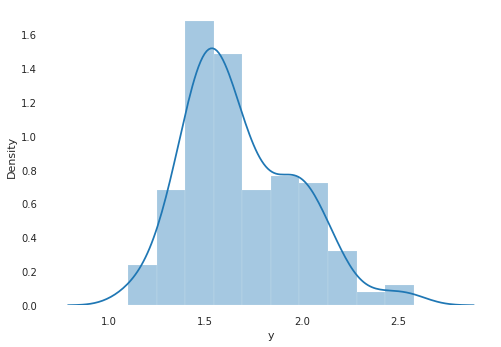

In [66]:
sns.distplot(df2.y)

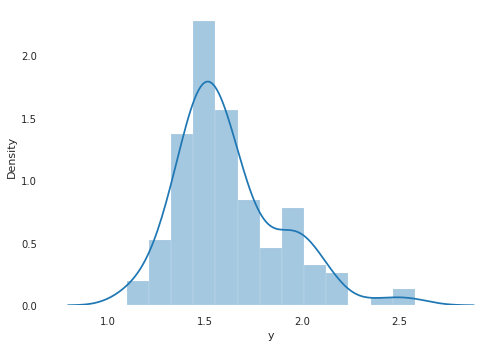

In [67]:
sns.distplot(train.y)

In [68]:
model_prp = Prophet(yearly_seasonality=True, \
                daily_seasonality = False, weekly_seasonality = False)

In [69]:
model_prp.fit(train)

In [70]:
# 34 weeks in test and 1 years to predict new values
weeks = pd.date_range('2017-08-06','2019-04-01',freq = 'W').strftime('%Y-%m-%d').tolist()
future = pd.DataFrame(weeks)
                  

In [71]:
future.head()

,0
0,2017-08-06
1,2017-08-13
2,2017-08-20
3,2017-08-27
4,2017-09-03


In [72]:
future.columns = ['ds']

In [73]:
future['ds'] = pd.to_datetime(future['ds'])

In [74]:
future.head()

,ds
0,2017-08-06
1,2017-08-13
2,2017-08-20
3,2017-08-27
4,2017-09-03


In [75]:
future.tail()

,ds
82,2019-03-03
83,2019-03-10
84,2019-03-17
85,2019-03-24
86,2019-03-31


In [76]:
# Use the model to make a forecast
forecast = model_prp.predict(future)

In [77]:
forecast[['ds','yhat']].tail()

,ds,yhat
82,2019-03-03,1.989064
83,2019-03-10,2.011927
84,2019-03-17,2.070961
85,2019-03-24,2.134011
86,2019-03-31,2.166488


In [78]:
df2.y.mean()

1.685207100591715

In [79]:
test.y.mean()

1.9355882352941176

In [80]:
y_test = test['y'].values

In [81]:
y_pred = forecast['yhat'].values[:34]

In [82]:
mse_prp = mean_squared_error(y_test,y_pred)
mae_prp = mean_absolute_error(y_test, y_pred)
print('MSE - FBProphet: ', mse_prp)
print('MAE - FBProphet: ', mae_prp)

MSE - FBProphet:  0.04732685588804886
MAE - FBProphet:  0.1740057649054156


# Visulaize the result

In [83]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])


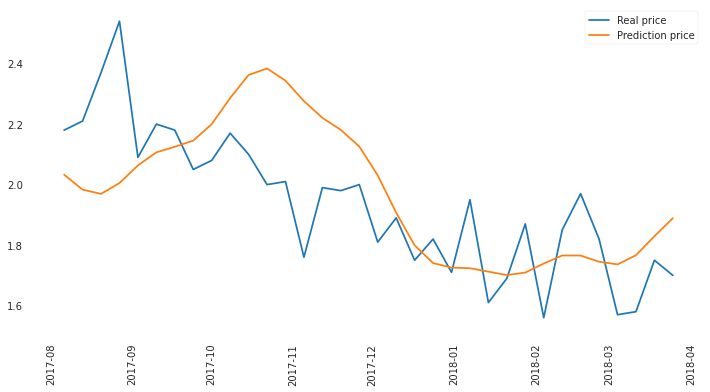

In [84]:

plt.figure(figsize=(12,6))
plt.plot(y_test_value, label='Real price')
plt.plot(y_pred_value, label='Prediction price')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


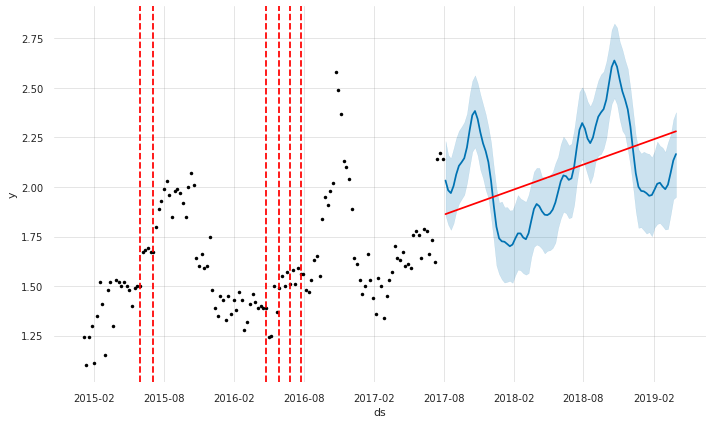

In [85]:
fig = model_prp.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), model_prp, forecast)

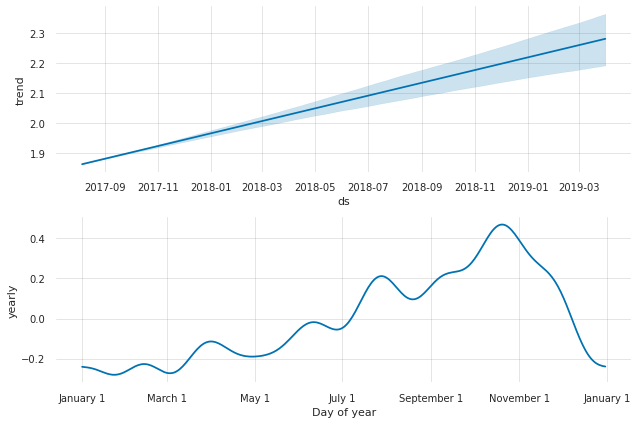

In [86]:
fig1 = model_prp.plot_components(forecast)
fig1.show()

In [87]:
forecast[['ds','yhat']].tail(52)

,ds,yhat
35,2018-04-08,1.902791
36,2018-04-15,1.877185
37,2018-04-22,1.860103
38,2018-04-29,1.858042
39,2018-05-06,1.866746
40,2018-05-13,1.885857
41,2018-05-20,1.921748
42,2018-05-27,1.974846
43,2018-06-03,2.028761
44,2018-06-10,2.058546


Long term prdiction for the next prediction - 3 years



In [88]:
model = Prophet(yearly_seasonality= True,\
            daily_seasonality = False, weekly_seasonality = False)

In [89]:
model.fit(df2)

In [90]:
future_3years = model.make_future_dataframe(periods=52*3, freq = 'W') # Next 3 years

In [91]:
forecast_3years =model.predict(future_3years)

In [92]:
forecast_3years.shape

(325, 16)

In [93]:
forecast_3years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          325 non-null    datetime64[ns]
 1   trend                       325 non-null    float64       
 2   yhat_lower                  325 non-null    float64       
 3   yhat_upper                  325 non-null    float64       
 4   trend_lower                 325 non-null    float64       
 5   trend_upper                 325 non-null    float64       
 6   additive_terms              325 non-null    float64       
 7   additive_terms_lower        325 non-null    float64       
 8   additive_terms_upper        325 non-null    float64       
 9   yearly                      325 non-null    float64       
 10  yearly_lower                325 non-null    float64       
 11  yearly_upper                325 non-null    float64       

In [94]:
forecast_3years.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [95]:
forecast_3years[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(5)


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
320,2021-02-21,2.391940,2.164080,2.627091,2.599138,2.478194,2.715805
321,2021-02-28,2.345902,2.112654,2.570521,2.603252,2.481779,2.720868
322,2021-03-07,2.323077,2.094447,2.562718,2.607365,2.485327,2.725691
323,2021-03-14,2.356774,2.098427,2.600439,2.611478,2.488463,2.731100
324,2021-03-21,2.429535,2.176787,2.660477,2.615591,2.490988,2.736678


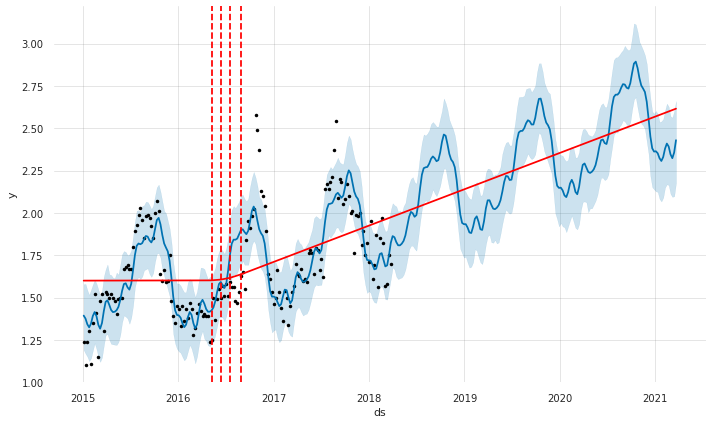

In [96]:
fig = model.plot(forecast_3years)
fig.show()
a = add_changepoints_to_plot(fig.gca(),model,forecast_3years)

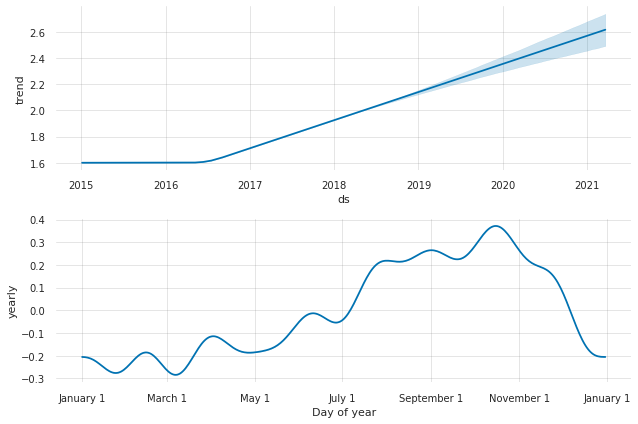

In [97]:
fig1 = model.plot_components(forecast_3years)
fig1.show()

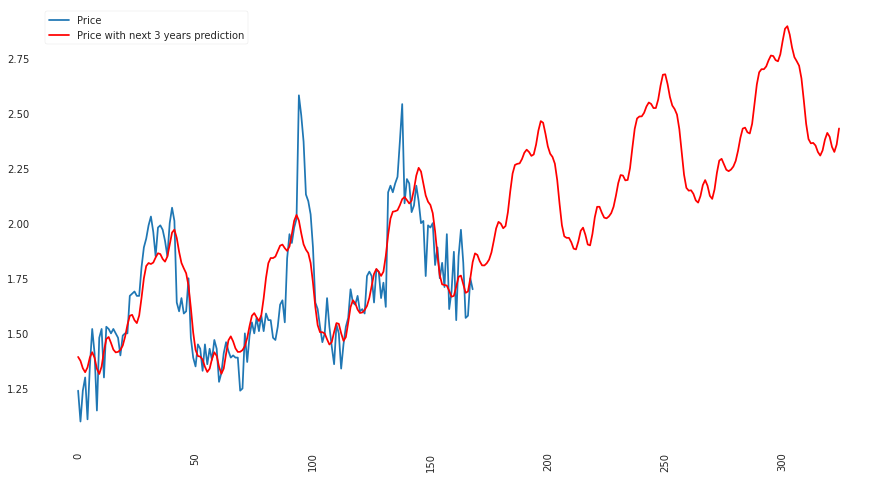

In [98]:
plt.figure(figsize=(15,8))
plt.plot(df2['y'], label='Price')
plt.plot(forecast_3years['yhat'], label='Price with next 3 years prediction', 
         color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


# Lựa chọn Model

In [99]:
df_cv = pd.DataFrame({'model': ['ARIMA', 'Holt-Winters', 'FbProphet'], 'MSE': [mse_arima, mse_holt, mse_prp], 'MAE': [mae_arima, mae_holt, mae_prp]})
df_cv

,model,MSE,MAE
0,ARIMA,0.095812,0.256788
1,Holt-Winters,0.049884,0.182828
2,FbProphet,0.047327,0.174006


Từ kết quả trên nhận thấy
- Mô hình ARIMA chưa áp dụng được tốt vào bài toán này
- Cả hai mô hình FBProphet và Holt-Winters đều có thể dùng để dự đoán giá bơ Organic. Tuy nhiên mô hình FB Prophet có chỉ số MSE/MAE thấp hơn so với mô hình Holt-Winters, do đó, có thể chọn FB Prophet để thực hiện việc dự đoán giá bơ organic


In [100]:
# Lưu lại tập tin Predict cho 1 năm tiếp theo
df_predict = forecast[['ds','yhat']].tail(52)
df_predict.head()

,ds,yhat
35,2018-04-08,1.902791
36,2018-04-15,1.877185
37,2018-04-22,1.860103
38,2018-04-29,1.858042
39,2018-05-06,1.866746


# Lưu Model

In [101]:
import pickle
pkl_filename = 'Cau2_PJ1.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_prp, file)